# 分类算法常用评价指标

##  二维混淆矩阵



                                         预测结果

          真实类别            类别1（正例）               类别2（反例）                               

         类别1（正例）        真正例(True Positive) TP    假反例(False Negatibe) FN

         类别2（反例）        假正例(False Positive)FP    真反例(True Negatibe) TN

In [1]:
from sklearn.metrics import confusion_matrix

sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)

- y_true: 是样本真实分类结果，y_pred: 是样本预测分类结果 
- labels：是所给出的类别，通过这个可对类别进行选择 
- sample_weight : 样本权重

关于类别顺序可由 labels参数控制调整，例如 labels=[2,1,0],则类别将以这个顺序自上向下排列。

默认数字类别是从小到大排列，英文类别是按首字母顺序排列

In [2]:
y_true =[0,0,1,0]
y_pred = [1,0,1,0]  

In [3]:
print(confusion_matrix(y_true, y_pred))

[[2 1]
 [0 1]]


In [4]:

y_true=[2,1,0,1,2,0]
y_pred=[2,0,0,1,2,1]
print(confusion_matrix(y_true, y_pred))

[[1 1 0]
 [1 1 0]
 [0 0 2]]


In [5]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

In [6]:
print(confusion_matrix(y_true, y_pred))

[[2 0 0]
 [0 0 1]
 [1 0 2]]


## 错误率与准确率(accuracy)

类正确的样本数占样本总数的比例——(TP+TN)/(TP+FP+TN+FN)

错误率 = 1-准确率

In [8]:
from sklearn.metrics import accuracy_score
y_true =[0,0,1,0]
y_pred = [1,0,1,0]
print(accuracy_score(y_true, y_pred))

0.75


## 精确率(Precision)



也叫查准率，表示正确分类的正例个数占分类为正例的实例个数的比例

    TP /(TP+FP)

In [9]:
from sklearn.metrics import precision_score

In [12]:
confusion_matrix(y_true, y_pred)

array([[2, 1],
       [0, 1]], dtype=int64)

In [11]:
precision_score(y_true, y_pred)

0.5

## 召回率

又称查全率（Recall），召回率是指分类器分类正确的正样本个数占所有的正样本个数的比例。

    TP / (TP+TN)

直观的理解，召回率是指分类器查找所有正样本的能力。

举例来说，召回率是指检索出的相关文档数和文档库中所有的相关文档数的比率，衡量的是检索系统的查全率。

In [14]:
from sklearn.metrics import recall_score
#y_true = [0, 1, 2, 0, 1, 2]
#y_pred = [0, 2, 1, 0, 0, 1]

y_true =[0,0,1,0]
y_pred = [1,0,1,0]

In [15]:
confusion_matrix(y_true, y_pred)

array([[2, 1],
       [0, 1]], dtype=int64)

In [16]:
recall_score(y_true, y_pred, average='macro')

0.8333333333333333

## F1-score

    基于召回率（Recall）与精确率（Precision）的调和平均，即将召回率和精确率综合起来评价，计算公式为:
        
        F1-score = 2 * R * P / (R+P)
        
   其中，P为准确率，R为召回率。精确率和准确率都高的情况下，F1值也会高。P和R指标有时候会出现的矛盾的情况，这样就需要综合考虑他们。F1-score值达到其最佳值 1 ，其最差分数为 0 。
        
除了F1之外，还有一个更普遍的计算公式(Fβ加权调和平均)：

    F- = (α^2+1) PR/(α^2)P + R)

In [17]:
from sklearn.metrics import f1_score

y_true =[0,0,1,0]
y_pred = [1,0,1,0]

In [18]:
f1_score(y_true, y_pred)

0.6666666666666666

（1）宏平均（macro-ave）

    先在各混淆矩阵上分别计算出查准率，查全率和F1，然后再计算平均值，这样就得到“宏查准率”（macro-P）、“宏查全率”（macro-R）、“宏F1”（macro-F1）
    
 （2）微平均（micro-ave）

     先将各混淆矩阵的对应元素进行平均，得到TP、FP、TN、FN的平均值，再基于这些平均值计算出“微查准率”（micro-P）、“微查全率”（micro-R）、“微F1”（micro-F1）

## 分类报告classification_report

sklearn中的classification_report函数用于显示主要分类指标的文本报告．在报告中显示每个类的精确度，召回率，F1值等信息。 

主要参数: 

- y_true：1维数组，或标签指示器数组/稀疏矩阵，目标值。 
- y_pred：1维数组，或标签指示器数组/稀疏矩阵，分类器返回的估计值。 
- labels：array，shape = [n_labels]，报表中包含的标签索引的可选列表。 
- target_names：字符串列表，与标签匹配的可选显示名称（相同顺序）。 
- sample_weight：类似于shape = [n_samples]的数组，可选项，样本权重。 
- digits：int，输出浮点值的位数．


In [22]:
from sklearn.metrics import classification_report
y_true =[0,0,1,0]
y_pred = [1,0,1,0]
target_names = ['class 0', 'class 1']

report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     class 0       1.00      0.67      0.80         3
     class 1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



其中列表左边的一列为分类的标签名，

右边support列为每个标签的出现次数．

avg / total行为各列的均值（support列为总和）． 

precision recall f1-score三列分别为各个类别的精确度/召回率及 F1 F1值

# sklearn实现分类评价指标

KC4数据准备：KC4.csv

使用随机森林实现分类并输出评价指标

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('demo_01/data.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
BRANCH_COUNT                       125 non-null float64
CALL_PAIRS                         125 non-null float64
CYCLOMATIC_COMPLEXITY              125 non-null float64
CYCLOMATIC_DENSITY                 125 non-null int64
DESIGN_COMPLEXITY                  125 non-null float64
DESIGN_DENSITY                     125 non-null float64
EDGE_COUNT                         125 non-null float64
ESSENTIAL_COMPLEXITY               125 non-null int64
ESSENTIAL_DENSITY                  125 non-null int64
MAINTENANCE_SEVERITY               125 non-null float64
NODE_COUNT                         125 non-null float64
NORMALIZED_CYLOMATIC_COMPLEXITY    125 non-null float64
NUMBER_OF_LINES                    125 non-null float64
LOC_TOTAL                          125 non-null float64
Defective                          125 non-null object
dtypes: float64(11), int64(3), object(1)
memory usage: 14.7+ K

In [13]:
X = df.values[:, 0:-1]

In [14]:
Y = df.values[:, -1]

In [15]:
Y.shape

(125,)

标签二值化

In [16]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [17]:
Y2 = lb.fit_transform(Y)
Y2

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

从高维直接变成一维

In [18]:
Y2.shape = 125

In [19]:
Y2

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [20]:

 
"""
函数说明：绘制ROC曲线
Parameters:
     labels:测试标签列表
     predict_prob:预测标签列表
"""
def plot_roc(labels, predict_prob):
    false_positive_rate, true_positive_rate, thresholds = \
        metrics.roc_curve(labels, predict_prob)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)  #计算AUC值
    print('AUC=' + str(roc_auc))
    plt.title('PC5-ROC')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.4f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    # plt.savefig('figures/PC5.png') #将ROC图片进行保存
    plt.show()
 


准确率: 0.9142857142857143
宏平均精确率: 0.9161184210526316
微平均精确率: 0.9142857142857143
宏平均召回率: 0.9133986928104575
平均F1-score: 0.9141453141453141
混淆矩阵输出: [[17  1]
 [ 2 15]]
分类报告:               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.94      0.88      0.91        17

    accuracy                           0.91        35
   macro avg       0.92      0.91      0.91        35
weighted avg       0.92      0.91      0.91        35

AUC=0.9133986928104575


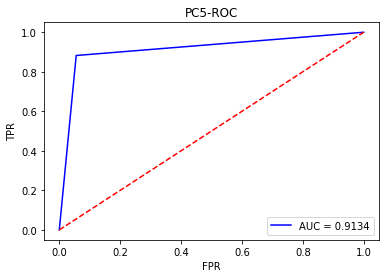

In [21]:

datasets, labels   = X, Y2# 对数据集进行处理
# 训练集和测试集划分
X_train = datasets[:115]
y_train = labels[:115]
X_test = datasets[90:]
y_test = labels[90:]
# 随机森林分类器
clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=200, random_state=0)
clf.fit(X_train, y_train)  # 使用训练集对分类器训练
y_predict = clf.predict(X_test)  # 使用分类器对测试集进行预测

print('准确率:', metrics.accuracy_score(y_test, y_predict)) #预测准确率输出
print('宏平均精确率:',metrics.precision_score(y_test,y_predict,average='macro')) #预测宏平均精确率输出
print('微平均精确率:', metrics.precision_score(y_test, y_predict, average='micro')) #预测微平均精确率输出
print('宏平均召回率:',metrics.recall_score(y_test,y_predict,average='macro'))#预测宏平均召回率输出
print('平均F1-score:',metrics.f1_score(y_test,y_predict,average='weighted'))#预测平均f1-score输出
print('混淆矩阵输出:',metrics.confusion_matrix(y_test,y_predict))#混淆矩阵输出

print('分类报告:', metrics.classification_report(y_test, y_predict))#分类报告输出
plot_roc(y_test, y_predict)  #绘制ROC曲线并求出AUC值


# ROC曲线

反映敏感性和特异性的综合指标。它通过将连续变量设定出多个不同的临界值，从而计算出一系列敏感性和特异性，再以敏感性为纵坐标、（1-特异性）为横坐标绘制成曲线，曲线下面积越大，判别的准确性越高。在ROC曲线上，最靠近坐标图左上方的点为敏感性和特异性均较高的临界值

根据机器学习中分类器的预测得分对样例进行排序，按照顺序逐个把样本作为正例进行预测，计算出FPR和TPR。分别以FPR、TPR为横纵坐标作图即可得到ROC曲线。所以作ROC曲线时，需要先求出FPR和TPR。

这两个变量的定义：

    FPR = TP/(TP+FN)
    TPR = TP/(TP+FP)



将样本输入分类器，每个样本将得到一个预测得分。我们通过设置不同的截断点，即可截取不同的信息。对应此示例图中，每个阈值的识别结果对应一个点(FPR，TPR)。当阈值取最大时，所有样本都被识别成负样本，对应于坐下角的点(0,0); 当阈值取最小时，所有样本都被识别成正样本，对应于右上角的点(1,1)，随着阈值从最大变化到最小，TP和FP都逐渐大；       

那么得到曲线后我们将用什么指标来衡量ROC曲线的好坏呢？这里给出AUC这个指标。AUC表示ROC曲线下方的面积值AUC（Area Under ROC Curve）：如果分类器能完美的将样本进行区分，那么它的AUG = 1 ; 如果模型是个简单的随机猜测模型，那么它的AUG = 0.5，对应图中的直线（y=x）。此外，如果一个分类器优于另一个，则它的曲线下方面积相对较大。



# 回归模型的评价指标

## Python实现回归模型的评价指标

In [1]:
import numpy  as np

In [3]:
# MES
def mse(y_test, y_true):
    return np.mean((y_test - y_true) ** 2)

In [4]:
# RMSE
def rmse(y_test, y_true):
    return np.sqrt(np.mean((y_test - y_true) ** 2))

In [5]:
# MAE
def mae(y_test, y_true):
    return np.sum(np.absolute(y_test - y_true)) / len(y_test)

In [7]:
# R^2
def r2(y_test, y_true):
    return 1 - ((y_test - y_true) ** 2).sum() / ((y_true - np.mean(y_true)) ** 2).sum()

## sklearn实现回归模型的评价指标

In [1]:
from sklearn.metrics import mean_squared_error   # 均方差
from sklearn.metrics import mean_absolute_error  # 平均绝对值误差
from sklearn.metrics import explained_variance_score # 可释方差得分
from sklearn.metrics import r2_score # .R2 决定系数（拟合优度）

y_true = [1,2,4]
y_pred = [1.3,2.5,3.7]


    模型越好：r2→1

    模型越差：r2→0

In [2]:
r2_score(y_true, y_pred)

0.9078571428571429

0.1433333333333333

0.36666666666666664

R2 决定系数（coefficient ofdetermination），有的教材上翻译为判定系数，也称为拟合优度。

决定系数反应了y的波动有多少百分比能被x的波动所描述，即表征依变数Y的变异中有多少百分比,可由控制的自变数X来解释.

    表达式：R2=SSR/SST=1-SSE/SST

    其中：SST=SSR+SSE，SST(total sum of squares)为总平方和，
    SSR(regression sum of squares)为回归平方和，
    SSE(error sum of squares) 为残差平方和。

注：（不同书命名不同）

    回归平方和：SSR(Sum of Squares forregression) = ESS (explained sum of squares)

    残差平方和：SSE（Sum of Squares for Error） = RSS(residual sum of squares)

    总离差平方和：SST(Sum of Squares fortotal) = TSS(total sum of squares)


意义：

    拟合优度越大，自变量对因变量的解释程度越高，自变量引起的变动占总变动的百分比高。观察点在回归直线附近越密集。

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [26]:

"""
# 利用 diabetes数据集来学习线性回归  
# diabetes 是一个关于糖尿病的数据集， 该数据集包括442个病人的生理数据及一年以后的病情发展情况。   
# 数据集中的特征值总共10项, 如下:  
    # 性别  
    #体质指数  
    #血压  
    #s1,s2,s3,s4,s4,s6  (六种血清的化验数据)  
    #但请注意，以上的数据是经过特殊处理， 10个数据中的每个都做了均值中心化处理，然后又用标准差乘以个体数量调整了数值范围。
    #验证就会发现任何一列的所有数值平方和为1.   
"""
# Load the diabetes dataset
diabetes = datasets.load_diabetes()  

# Use only one feature  
# 增加一个维度，得到一个体质指数数组[[1],[2],...[442]]
diabetesX = diabetes.data[:, np.newaxis, 2]
#print(diabetes_X)
 
# Split the data into training/testing sets
diabetes_X_train = diabetesX[0:-20]
diabetes_X_test = diabetesX[-20:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]


In [28]:
# Create linear regression object
lr = linear_model.LinearRegression()
 
# Train the model using the training sets
lr.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
y_pred = lr.predict(diabetes_X_test)
 
# The coefficients  
# 查看相关系数 
print(lr.coef_)
 
 # The mean squared error  
# 均方差
# 查看残差平方的均值(mean square error,MSE) 
print(mean_squared_error(diabetes_y_test, y_pred))

# Explained variance score: 1 is perfect prediction 
#  R2 决定系数（拟合优度）
# 模型越好：r2→1
# 模型越差：r2→0
print(r2_score(diabetes_y_test, y_pred))

[938.23786125]
2548.0723987259694
0.47257544798227147


In [6]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
 
plt.xticks(())
plt.yticks(())
 
plt.show()

NameError: name 'diabetes_X_test' is not defined

# 总结 

[模型评估](https://blog.csdn.net/shine19930820/article/details/78335550)


有三种不同的方法来评估一个模型的预测质量：

- estimator的score方法：sklearn中的estimator都具有一个score方法，它提供了一个缺省的评估法则来解决问题。
- Scoring参数：使用cross-validation的模型评估工具，依赖于内部的scoring策略。见下。
- 通过测试集上评估预测误差：sklearn Metric函数用来评估预测误差。